## Simulation & Modeling Techniques
### HW5: Case studies & Epidemiology

Librairies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import sympy
import pint
UNITS = pint.UnitRegistry()
import modsim
from modsim import*
from pandas import read_html

Under the hook

In [2]:
filename = 'World_population_estimates.html'
tables = read_html(filename, header=0, index_col=0, decimal='M')
table2 = tables[2]
table2.columns = ['census', 'prb', 'un', 'maddison', 
                  'hyde', 'tanton', 'biraben', 'mj', 
                  'thomlinson', 'durand', 'clark']
table2.shape

(67, 11)

In [3]:
census = table2.census / 1e9
census.shape

(67,)

In [4]:
un = table2.un / 1e9
un.shape

(67,)

### 1. Optional exercise, chap 10

Load the data

In [5]:
filename = 'World_population_estimates.html'
tables = read_html(filename, header=0, index_col=0, decimal='M')
len(tables)

6

Select tables[1], which is the second table on the page.

In [6]:
table1 = tables[1]
table1.head()

,Population Reference Bureau (1973–2016)[15],United Nations Department of Economic and Social Affairs (2015)[16],Maddison (2008)[17],HYDE (2010)[citation needed],Tanton (1994)[18],Biraben (1980)[19],McEvedy & Jones (1978)[20],Thomlinson (1975)[21],Durand (1974)[22],Clark (1967)[23]
Year,,,,,,,,,,
-10000,NaN,NaN,NaN,2M[24],NaN,NaN,4.0,1–10M,NaN,NaN
-9000,NaN,NaN,NaN,4.,NaN,NaN,NaN,NaN,NaN,NaN
-8000,5.,NaN,NaN,5.,NaN,NaN,NaN,NaN,5–10M,NaN
-7000,NaN,NaN,NaN,8.,NaN,NaN,NaN,NaN,NaN,NaN
-6000,NaN,NaN,NaN,11.,NaN,NaN,NaN,NaN,NaN,NaN


Not all agencies and researchers provided estimates for the same dates. Again NaN is the special value that indicates missing data.

In [7]:
table1.tail()

,Population Reference Bureau (1973–2016)[15],United Nations Department of Economic and Social Affairs (2015)[16],Maddison (2008)[17],HYDE (2010)[citation needed],Tanton (1994)[18],Biraben (1980)[19],McEvedy & Jones (1978)[20],Thomlinson (1975)[21],Durand (1974)[22],Clark (1967)[23]
Year,,,,,,,,,,
1913,NaN,NaN,1793.,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1920,NaN,1860.0,1863.,1912.,NaN,NaN,NaN,NaN,NaN,1968.
1925,NaN,NaN,NaN,NaN,NaN,NaN,2000.0,NaN,NaN,NaN
1930,NaN,2070.0,NaN,2092.,NaN,NaN,NaN,NaN,NaN,2145.
1940,NaN,2300.0,2299.,2307.,NaN,NaN,NaN,NaN,NaN,2340.


Again, we'll replace the long column names with more convenient abbreviations.

In [8]:
table1.columns = ['PRB', 'UN', 'Maddison', 'HYDE', 'Tanton', 
                  'Biraben', 'McEvedy & Jones', 'Thomlinson', 'Durand', 'Clark']

Some of the estimates are in a form Pandas doesn't recognize as numbers, but we can coerce them to be numeric.

In [9]:
for col in table1.columns:
    table1[col] = pd.to_numeric(table1[col], errors='coerce')

Here are the results. Notice that we are working in millions now, not billions.

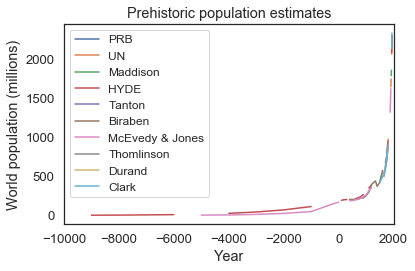

In [10]:
table1.plot()
decorate(xlim=[-10000, 2000], xlabel='Year', 
         ylabel='World population (millions)',
         title='Prehistoric population estimates')
plt.legend(fontsize='small');

We can use xlim to zoom in on everything after Year 0.

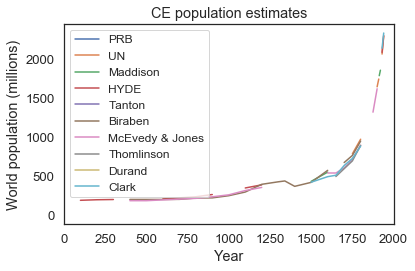

In [11]:
table1.plot()
decorate(xlim=[0, 2000], xlabel='Year', 
         ylabel='World population (millions)',
         title='CE population estimates')
plt.legend(fontsize='small');

See if you can find a model that fits these data well from Year 0 to 1950.

How well does your best model predict actual population growth from 1950 to the present?

We will use the following function:

$\frac{x1+x2}{x3-x}$

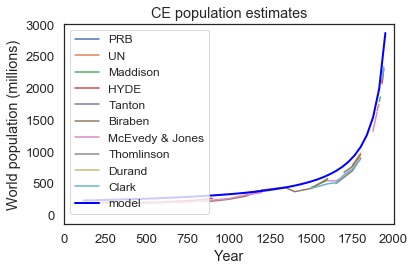

In [12]:
# Defining the variables(randomly with trials)
x1 = 120
x2 = 220000
t_0 = 1950
t_end = 2030

x = linspace(x1, t_0)
y = x1 + x2 / (t_end - x)

table1.plot()
plot(x, y, color='blue', label='model')

decorate(xlim=[0, 2000], xlabel='Year', 
         ylabel='World population (millions)',
         title='CE population estimates')

plt.legend(fontsize='small');

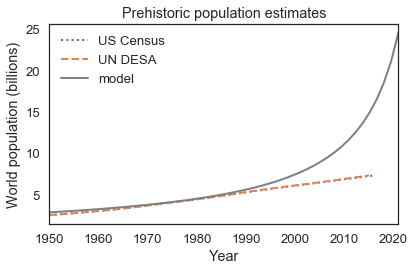

In [13]:

t_new = 2021

plot(census, ':', label='US Census')
plot(un, '--', label='UN DESA')

x = linspace(t_0, t_new)
y = x1 + 220000 / (t_end - x)
plot(x, y/1000, color='gray', label='model')

decorate(xlim=[t_0, t_new], xlabel='Year', 
         ylabel='World population (billions)',
         title='Prehistoric population estimates')




The model underestimate the data well from 1950 to 1990 then overestimate it from then to present

## 2. Time series simulation

SIR Implementation 

In [14]:
init = State(S=89, I=1, R=0)
init /= sum(init)

Make_system creates a System object with the given parameters.

In [15]:
def make_system(beta, gamma):
    """Make a system object for the SIR model.
    
    beta: contact rate in days
    gamma: recovery rate in days
    
    returns: System object
    """
    init = State(S=89, I=1, R=0)
    init /= sum(init)

    t0 = 0
    t_end = 7 * 14

    return System(init=init, t0=t0, t_end=t_end,
                  beta=beta, gamma=gamma)

The update function takes the state during the current time step and returns the state during the next time step.

In [16]:
def update_func(state, t, system):
    """Update the SIR model.
    
    state: State with variables S, I, R
    t: time step
    system: System with beta and gamma
    
    returns: State object
    """
    s, i, r = state

    infected = system.beta * i * s    
    recovered = system.gamma * i
    
    s -= infected
    i += infected - recovered
    r += recovered
    
    return State(S=s, I=i, R=r)

Run simulation

In [17]:
def run_simulation(system, update_func):
    """Runs a simulation of the system.
    
    system: System object
    update_func: function that updates state
    
    returns: State object for final state
    """
    state = system.init
    
    for t in linrange(system.t0, system.t_end):
        state = update_func(state, t, system)
        
    return state

**Question:** Suppose the time between contacts is 4 days and the recovery time is 5 days. After 14 weeks, how many students, total, have been infected?

Hint: what is the change in S between the beginning and the end of the simulation?

In [18]:
# Given 

tc = 4       
tr = 5      

beta = 1 / tc      
gamma = 1 / tr     

system = make_system(beta, gamma)
s0 = system.init.S

final = run_simulation(system, update_func)
s_end = final.S
round (s0 - s_end, 4)

0.3787

TimeSeries object

In [19]:
def run_simulation(system, update_func):
    """Runs a simulation of the system.
    
    Add three Series objects to the System: S, I, R
    
    system: System object
    update_func: function that updates state
    """
    S = TimeSeries()
    I = TimeSeries()
    R = TimeSeries()

    state = system.init
    t0 = system.t0
    S[t0], I[t0], R[t0] = state
    
    for t in linrange(system.t0, system.t_end):
        state = update_func(state, t, system)
        S[t+1], I[t+1], R[t+1] = state
    
    return S, I, R

In [20]:
def plot_results(S, I, R):
    """Plot the results of a SIR model.
    
    S: TimeSeries
    I: TimeSeries
    R: TimeSeries
    """
    plot(S, '--', label='Susceptible')
    plot(I, '-', label='Infected')
    plot(R, ':', label='Recovered')
    decorate(xlabel='Time (days)',
             ylabel='Fraction of population')

In [21]:

def run_simulation(system, update_func):
    """Runs a simulation of the system.
        
    system: System object
    update_func: function that updates state
    
    returns: TimeFrame
    """
    frame = TimeFrame(columns=system.init.index)
    frame.row[system.t0] = system.init
    
    for t in linrange(system.t0, system.t_end):
        frame.row[t+1] = update_func(frame.row[t], t, system)
    
    return frame

**Exercise Question:** Suppose the time between contacts is 4 days and the recovery time is 5 days. Simulate this scenario for 14 weeks and plot the results.

Here, we are going to define days, find beta and gamma, then simulate the scenario by calling run_simulation fuction which calls make_system function

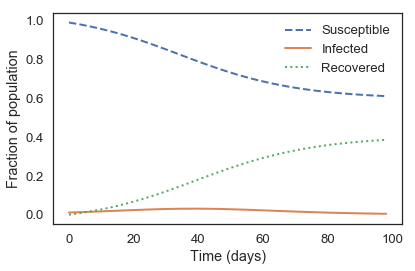

In [22]:
# Given days

tc = 4       
tr = 5      

beta = 1 / tc      
gamma = 1 / tr   

# Calling functions

system = make_system(beta, gamma)
results = run_simulation(system, update_func)

plot_results(results.S, results.I, results.R)